# Basic Hand Movements EMG Exploratory Data Analysis
First step towards establishing a baseline for the EMG signals is examining which feature extracted serves the purpose best. So far I've extracted the absolute value of each signal, the average amplitude per signal over adjacent windows of 50 samples, average amplitude per signal over overlapping windows of 345 with an overlap of 300 samples, and the signal envelope using a lowpass filter.

In [5]:
#set up the environment and read in each df of extracted features
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy as sp
import matplotlib.pyplot as plt

df = pd.read_csv('df')
df_corrected = pd.read_csv('df_corrected')
df_amp_adj = pd.read_csv('amp_adj_df')
df_amp_ol = pd.read_csv('amp_ol_df')
df_envelope = pd.read_csv('envelope_df')

In [6]:
#drop the odd column from the front. somehow it looks like in writing the files I wrote the index to a column 
df_corrected = df_corrected.drop(labels='Unnamed: 0',axis = 1)
df_amp_adj = df_amp_adj.drop('Unnamed: 0', axis=1)
df_amp_ol = df_amp_ol.drop('Unnamed: 0', axis=1)
df_envelope = df_envelope.drop('Unnamed: 0', axis=1)

## Sample comparison
Since the purpose of this is to select the best feature for extracting a baseline, let us first look and a sample and take a side by side comparison of the extracted features.

Text(0.5,1,'female_1 cylinder ch1 EMG envelope sample')

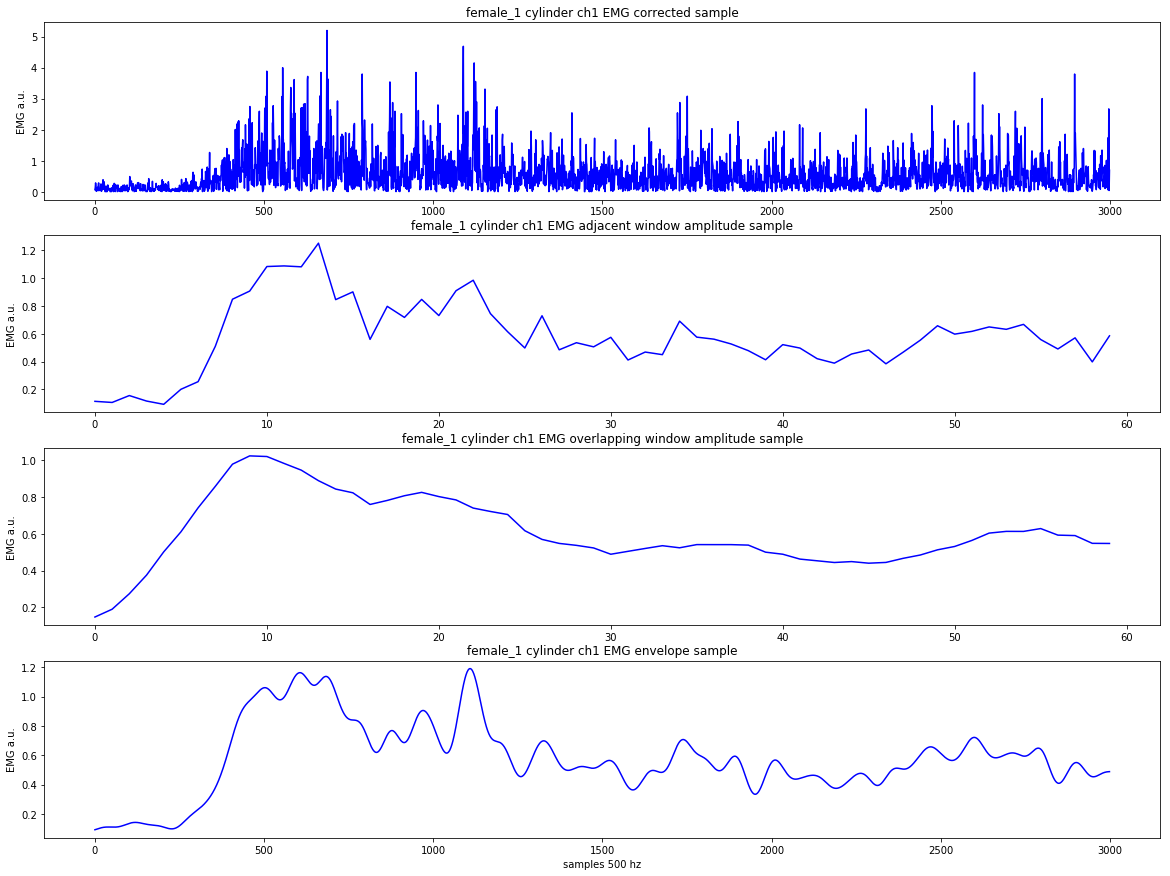

In [7]:
#plot the first sample from each data frame
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
plt.plot(np.array(df_corrected.iloc[0,:3000]), c='b')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG corrected sample')

plt.subplot(4,1,2)

plt.plot(np.array(df_amp_adj.iloc[0,:60]), c='b')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG adjacent window amplitude sample')

plt.subplot(4,1,3)
plt.plot(np.array(df_amp_ol.iloc[0,:60]), c='b')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG overlapping window amplitude sample')

plt.subplot(4,1,4)
plt.plot(np.array(df_envelope.iloc[0,:3000]), c='b')
plt.xlabel('samples 500 hz')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG envelope sample')

As we can see, the corrected signal alone is not particularly revealing. The enveloped signal was the closest and most digestible decomposition of the signal, capturing a lot of the variation while smoothing out the signal. The mean amplitude extracted over adjacent windows reduces the number of samples substantially while still capturing the overall shape of the signal. Finally, the mean amplitude over overlapping windows rendered the smoothest and most simplified version of the signal. 
## Sample Similarity
Are all the samples to one grouping and subject similar? lets investigate by selecting out one channel of a grip from one subject `female_1` and plotting all signals over each other to observe similarity.

Text(0.5,1,'female_1 cylinder ch1 EMG envelope signals')

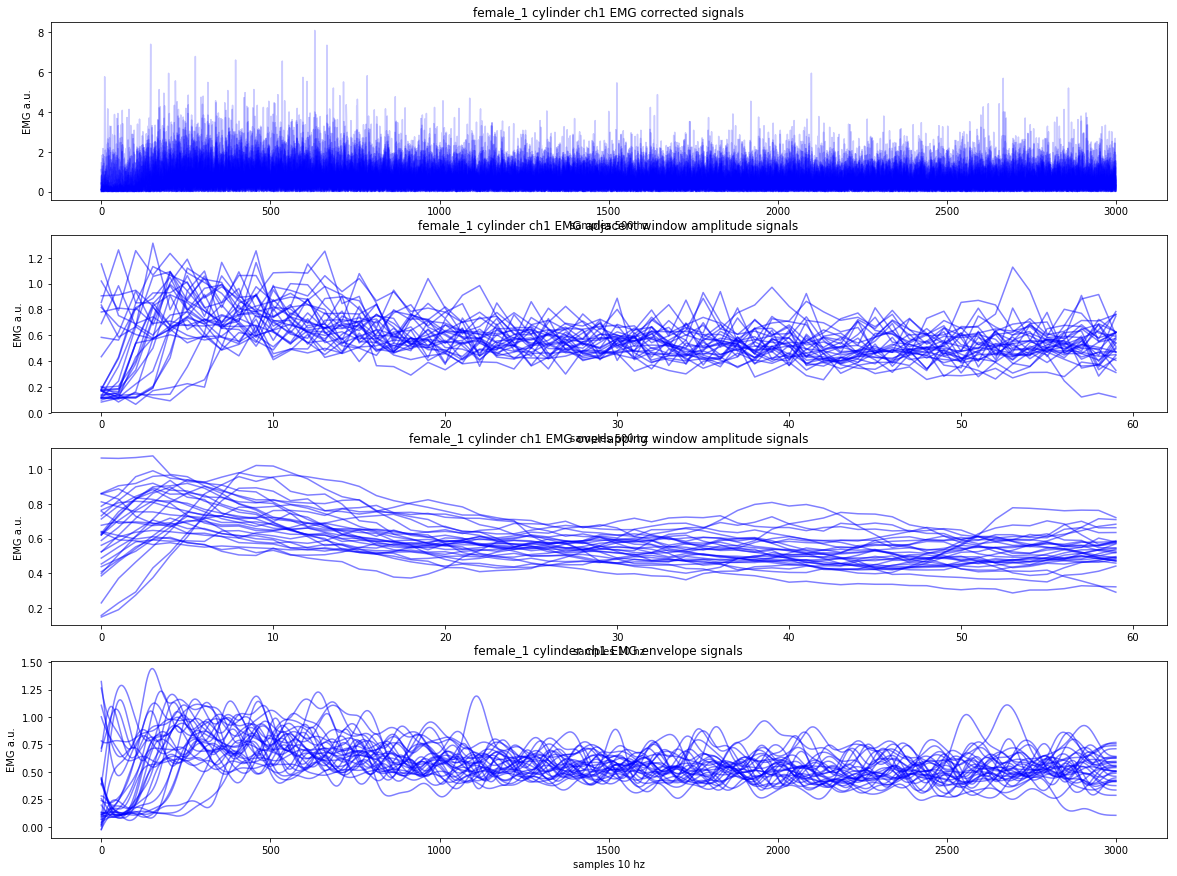

In [8]:
#select out samples for grip channel 'cly_ch1' for subject 'female_1' for each feature df
f1_cly_ch1_corrected = df_corrected.loc[(df_corrected['subject'] == 'female_1')&(df_corrected['grip_channel'] == 'cyl_ch1')]
f1_cly_ch1_adj = df_amp_adj.loc[(df_amp_adj['subject'] == 'female_1')&(df_amp_adj['grip_channel'] == 'cyl_ch1')]
f1_cly_ch1_ol = df_amp_ol.loc[(df_amp_ol['subject'] == 'female_1')&(df_amp_ol['grip_channel'] == 'cyl_ch1')]
f1_cyl_ch1 = df_envelope.loc[(df_envelope['subject'] == 'female_1')&(df_envelope['grip_channel'] == 'cyl_ch1')]

plt.figure(figsize=(20,15))

plt.subplot(4,1,1)

#plot all samples from selected rows. make sure to only plot up to column 2999 to skip categorical columns
for x, y in f1_cly_ch1_corrected.iloc[:,:3000].iterrows():
    plt.plot(np.array(y), c='b', alpha=0.2)
plt.xlabel('samples 500 hz')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG corrected signals')

plt.subplot(4,1,2)

for x, y in f1_cly_ch1_adj.iloc[:,:60].iterrows():
    plt.plot(np.array(y), c='b', alpha=0.5)
    
plt.xlabel('samples 500 hz')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG adjacent window amplitude signals')
    
plt.subplot(4,1,3)


for x, y in f1_cly_ch1_ol.iloc[:,:60].iterrows():
    plt.plot(np.array(y), c='b', alpha=0.5)
    
plt.xlabel('samples 10 hz')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG overlapping window amplitude signals')
    
plt.subplot(4,1,4)

for x, y in f1_cyl_ch1.iloc[:,:3000].iterrows():
    plt.plot(np.array(y), c='b', alpha=0.5)
    
plt.xlabel('samples 10 hz')
plt.ylabel('EMG a.u.')
plt.title('female_1 cylinder ch1 EMG envelope signals')

This is interesting. I can see advantages in each of the extracted features. For instance, the envelope captures a realistic amount of variation across a population. The mean amplitude over overlapping windows does the opposite by cutting down the huge amount of variation that appears in the samples. In the middle is the mean amplitude over adjacent windows which captures the shape of the envelope while cutting down on the number of samples substantially, thus possibily cutting down on computation time if that should become necessary. 
## Conclusion
From this analysis it would appear that two good options for computing the baseline signal of the populations would be the signal envelope and the mean amplitude extracted over adjacent windows, as they capture the greatest amount of variation. In contrast, when comparing new signals to the baselines, using the mean amplitude extracted over overlapping windows might help reduce that signals variation and make it easier to compare to a baseline signal. 